In [2]:
import numpy as np
np.random.seed(42)
# A =  X  1
A = np.array ( [
[1 , 2.0],
[1 , 3.0],
[1 , 4.5],
[1 , 5.5]
] )
# y =
y = np.array ( [
[3.1],
[4.9],
[8.2],
[10.1]
] )
m = len ( y )


In [3]:
theta_normal = np.linalg.inv(A.T @ A) @ A.T @ y
print(theta_normal)

[[-1.04137931]
 [ 2.03103448]]


In [6]:
m = len(y)
theta = np.zeros((2, 1))
learning_rate = 0.01
n_iterations = 1000

for iteration in range(n_iterations):
    gradients = (1/m) * A.T @ (A @ theta - y)
    theta = theta - learning_rate * gradients

print(theta)

[[-0.55217831]
 [ 1.9146829 ]]


In [7]:
U, s, Vt = np.linalg.svd(A, full_matrices=False)
s_inv = np.diag(1 / s)
A_pinv = Vt.T @ s_inv @ U.T
theta_svd = A_pinv @ y

print(theta_svd)

[[-1.04137931]
 [ 2.03103448]]


In [37]:
m = len(y)
# noise = np.random.rand(m, 1)
noise = np.zeros((m,1))

A_collinear = np.hstack((A, A[:, [1]] + noise))
print(A_collinear)

theta_normal_collinear = np.linalg.inv(A_collinear.T @ A_collinear) @ A_collinear.T @ y
print("\n", theta_normal_collinear)
print("\n[" + "]\n[".join([f"{x[0]:.8f}" for x in theta_normal_collinear]) + "]")

[[1.  2.  2. ]
 [1.  3.  3. ]
 [1.  4.5 4.5]
 [1.  5.5 5.5]]


LinAlgError: Singular matrix

In [39]:
U, s, Vt = np.linalg.svd(A_collinear, full_matrices=False)
s_inv = np.diag(1 / s)
A_pinv = Vt.T @ s_inv @ U.T
theta_svd_collinear = A_pinv @ y

print(theta_svd_collinear)
print("\n[" + "]\n[".join([f"{x[0]:.8f}" for x in theta_svd_collinear]) + "]")

[[-1.04137931e+00]
 [-2.36400575e+15]
 [ 2.36400575e+15]]

[-1.04137931]
[-2364005752194400.00000000]
[2364005752194400.00000000]


In [41]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin', 'CarName']
data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)
data_mpg = data_mpg.dropna(subset=['Horsepower'])
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

C:\Users\Reza\AppData\Local\Temp\ipykernel_10080\2150952829.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)


In [43]:
print(data_mpg)

X = data_mpg[['Horsepower']].values
y = data_mpg['MPG'].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

A = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     ModelYear  Origin                    CarName  
0           70       1  chevrolet chevelle malibu  
1           70       1         

In [45]:
from sklearn.preprocessing import StandardScaler

y = data_mpg['MPG'].values.reshape(-1, 1)

X = data_mpg['Horsepower'].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

A = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [53]:
learning_rate = 0.01
n_iterations_sgd = 5000
n_iterations_bgd = 1000
m = len(y)

def compute_cost(A, y, theta):
    predictions = A @ theta
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost

theta_sgd = np.zeros((2, 1))
cost_history_sgd = []

for iteration in range(n_iterations_sgd):
    i = np.random.randint(m)
    A_i = A[i : i + 1]
    y_i = y[i : i + 1]
    
    gradient = A_i.T @ (A_i @ theta_sgd - y_i)
    theta_sgd = theta_sgd - learning_rate * gradient
    
    cost = compute_cost(A, y, theta_sgd)
    cost_history_sgd.append(cost)

theta_bgd = np.zeros((2, 1))
cost_history_bgd = []

for iteration in range(n_iterations_bgd):
    gradients = (1 / m) * A.T @ (A @ theta_bgd - y)
    theta_bgd = theta_bgd - learning_rate * gradients
    
    cost = compute_cost(A, y, theta_bgd)
    cost_history_bgd.append(cost)

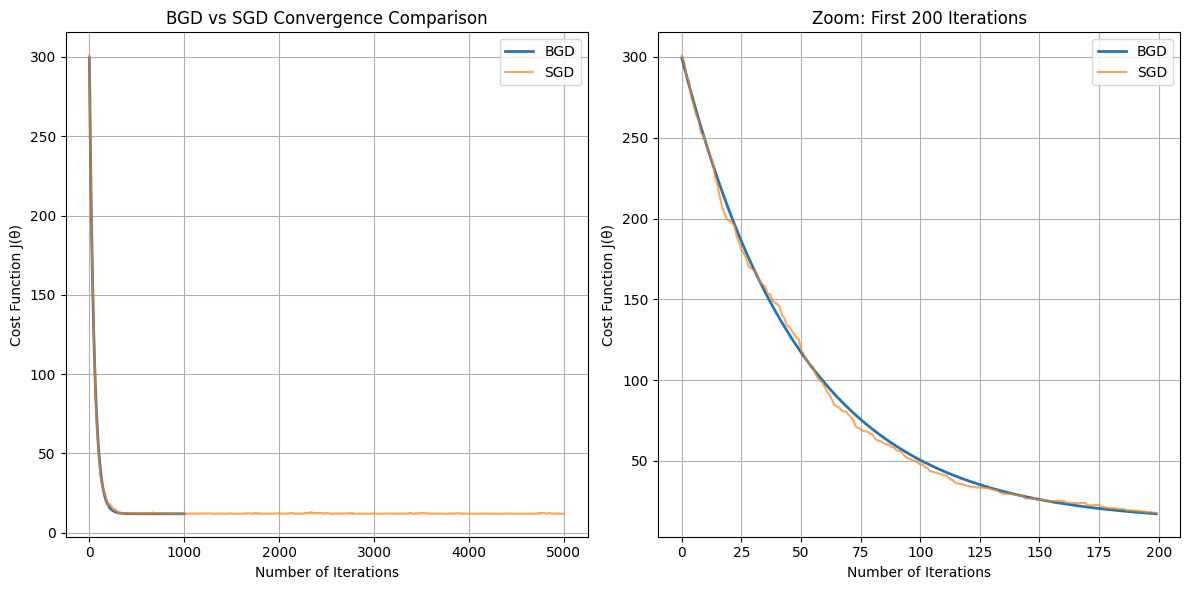

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(n_iterations_bgd), cost_history_bgd, label='BGD', linewidth=2)
plt.plot(range(n_iterations_sgd), cost_history_sgd, label='SGD', alpha=0.7)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function J(θ)')
plt.title('BGD vs SGD Convergence Comparison')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(200), cost_history_bgd[:200], label='BGD', linewidth=2)
plt.plot(range(200), cost_history_sgd[:200], label='SGD', alpha=0.7)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function J(θ)')
plt.title('Zoom: First 200 Iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('convergence_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
X_poly = np.column_stack([
    X,
    X**2
])

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

A_poly = np.hstack([np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled])
print(A_poly[:10])

[[1.         0.66413273 0.45997873]
 [1.         1.57459447 1.513418  ]
 [1.         1.18439658 1.03133562]
 [1.         1.18439658 1.03133562]
 [1.         0.92426466 0.73545438]
 [1.         2.43302983 2.7356116 ]
 [1.         3.00532006 3.67386123]
 [1.         2.8752541  3.4519503 ]
 [1.         3.13538603 3.90087357]
 [1.         2.22492429 2.41891664]]
